In [1]:
install.packages("nortest")
install.packages("tseries")
install.packages("ggplot2")

library(ggplot2)
library(tseries)
library(nortest)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
obitospb = read.csv("anomes_ob.csv")
hosptpb = read.csv("anomes_hospt.csv")
hosptvale = read.csv("anomes_hospt_vale.csv")

In [3]:
obitospb <- ts(obitospb[,2])
hosptpb <- ts(hosptpb[,2])
hosptvale <- ts(hosptvale[,2])

In [4]:
ts_obitospb = ts(obitospb, start=c(2009,01), frequency=12)
ts_hosptpb = ts(hosptpb, start=c(2009,01), frequency=12)
ts_hosptvale = ts(hosptvale, start=c(2009,01), frequency=12)

In [5]:
lillie.test(obitospb)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  obitospb
D = 0.11427, p-value = 0.0002281


In [6]:
lillie.test(hosptpb)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  hosptpb
D = 0.03281, p-value = 0.979


In [7]:
lillie.test(hosptvale)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  hosptvale
D = 0.081279, p-value = 0.03239


In [8]:
adf.test(obitospb, k = 0)

Warning message in adf.test(obitospb, k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  obitospb
Dickey-Fuller = -9.5041, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [9]:
adf.test(hosptpb, k = 0)

Warning message in adf.test(hosptpb, k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  hosptpb
Dickey-Fuller = -5.0729, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [10]:
adf.test(hosptvale, k = 0)

Warning message in adf.test(hosptvale, k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  hosptvale
Dickey-Fuller = -10.199, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


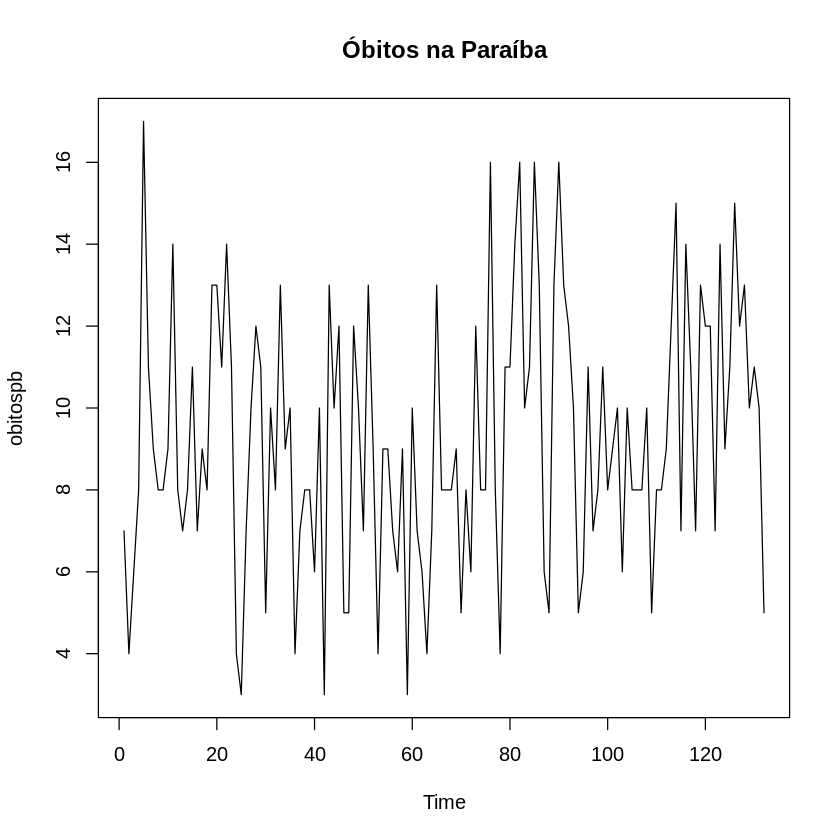

In [11]:
plot.ts(obitospb,main="Óbitos na Paraíba")    

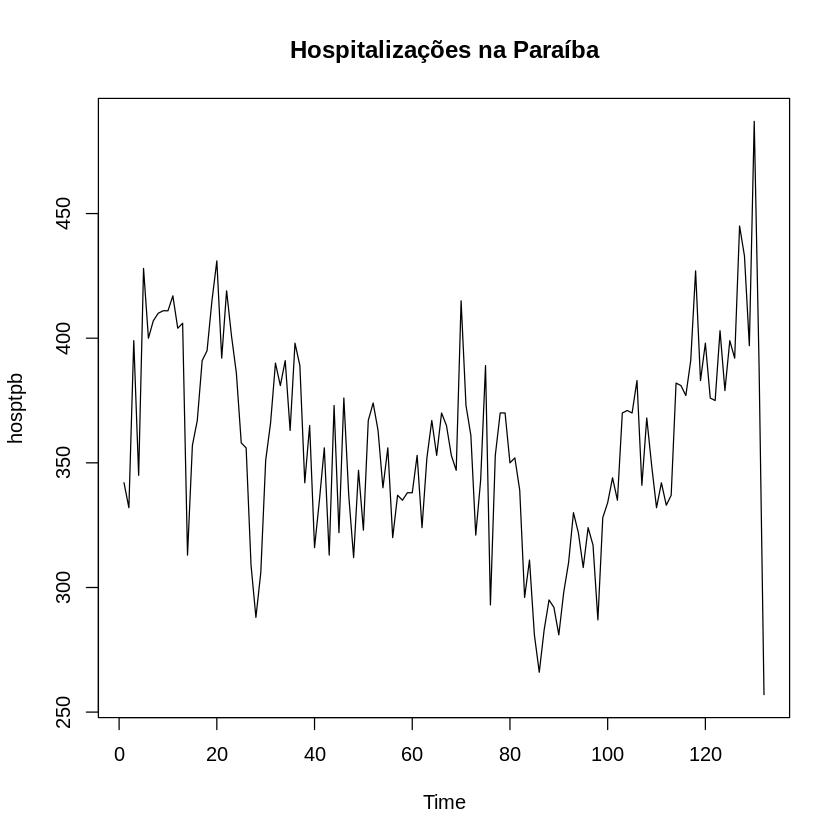

In [12]:
plot.ts(hosptpb,main="Hospitalizações na Paraíba")    

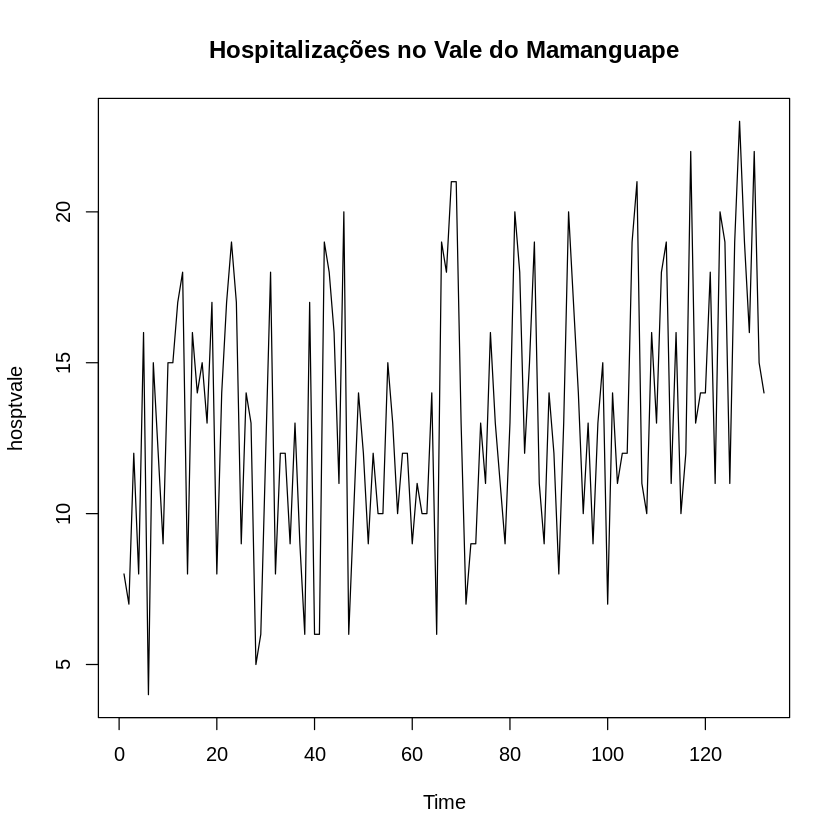

In [13]:
plot.ts(hosptvale,main="Hospitalizações no Vale do Mamanguape")    

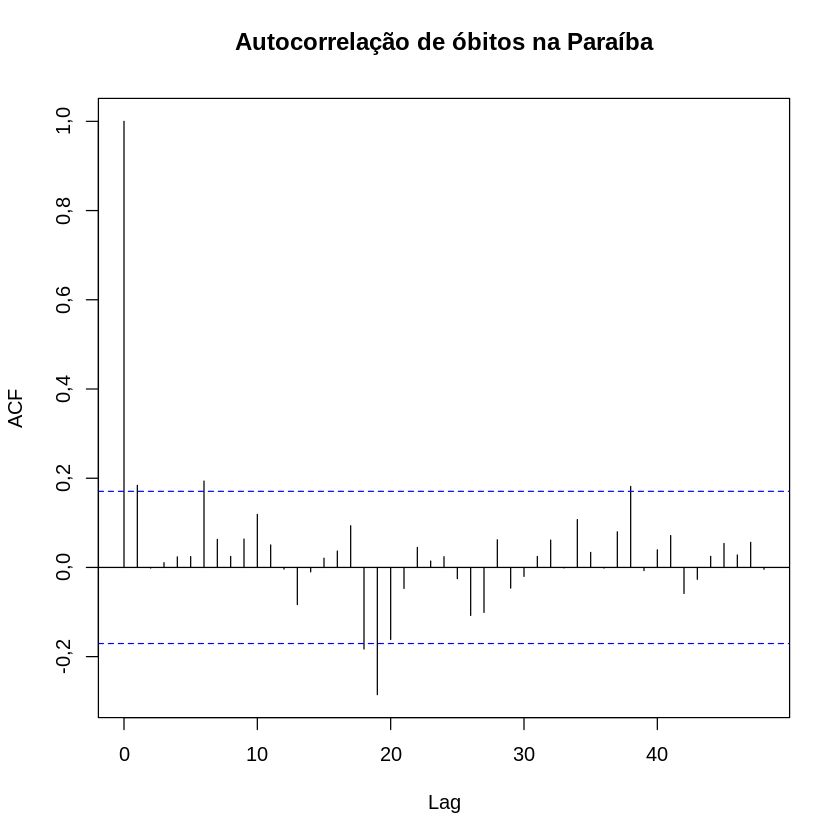

In [14]:
acf(obitospb,lag=48,main="Autocorrelação de óbitos na Paraíba")

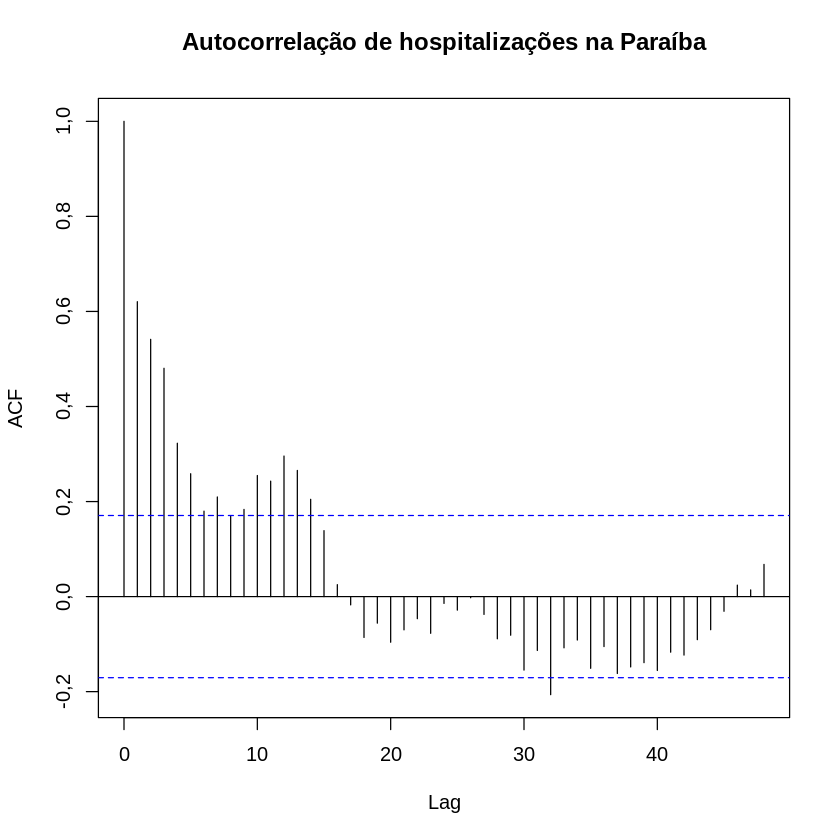

In [15]:
acf(hosptpb,lag=48,main="Autocorrelação de hospitalizações na Paraíba")

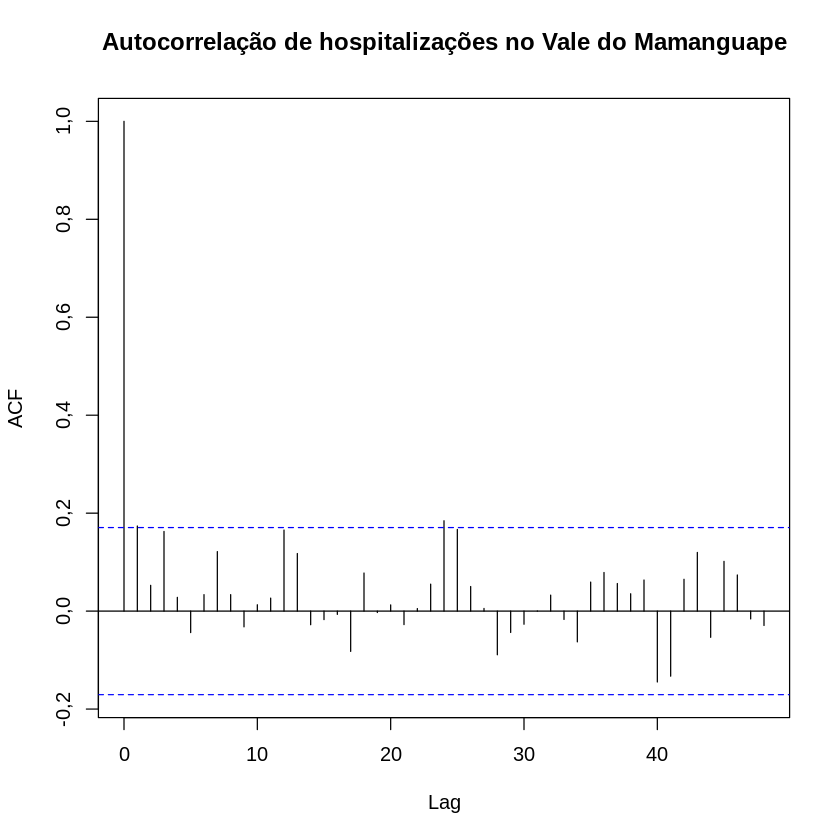

In [16]:
acf(hosptvale,lag=48,main="Autocorrelação de hospitalizações no Vale do Mamanguape")

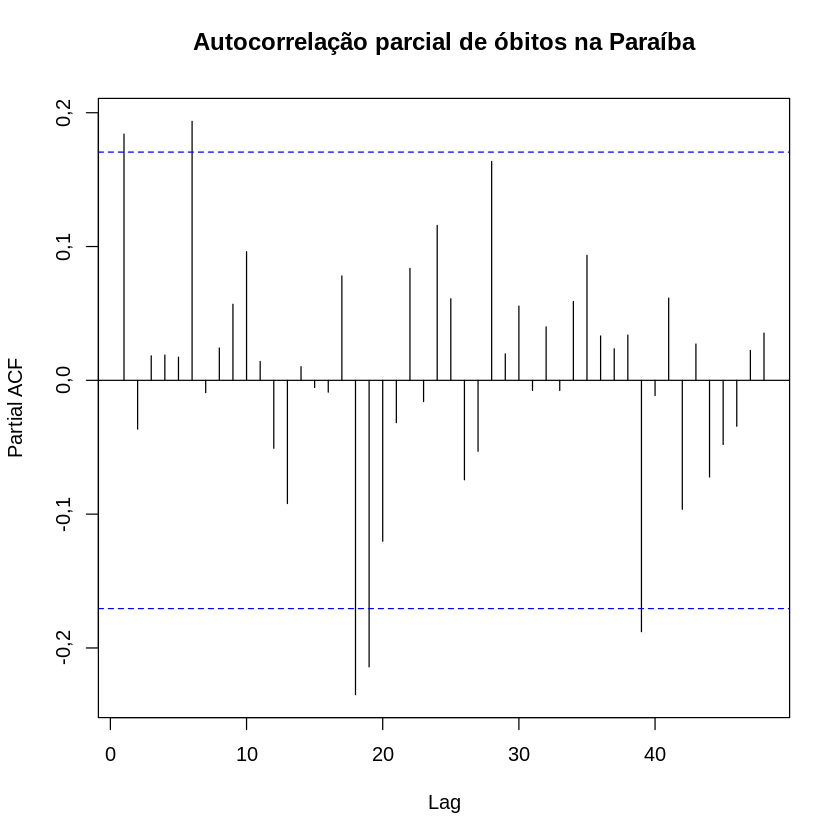

In [17]:
pacf(obitospb,lag=48,main="Autocorrelação parcial de óbitos na Paraíba")

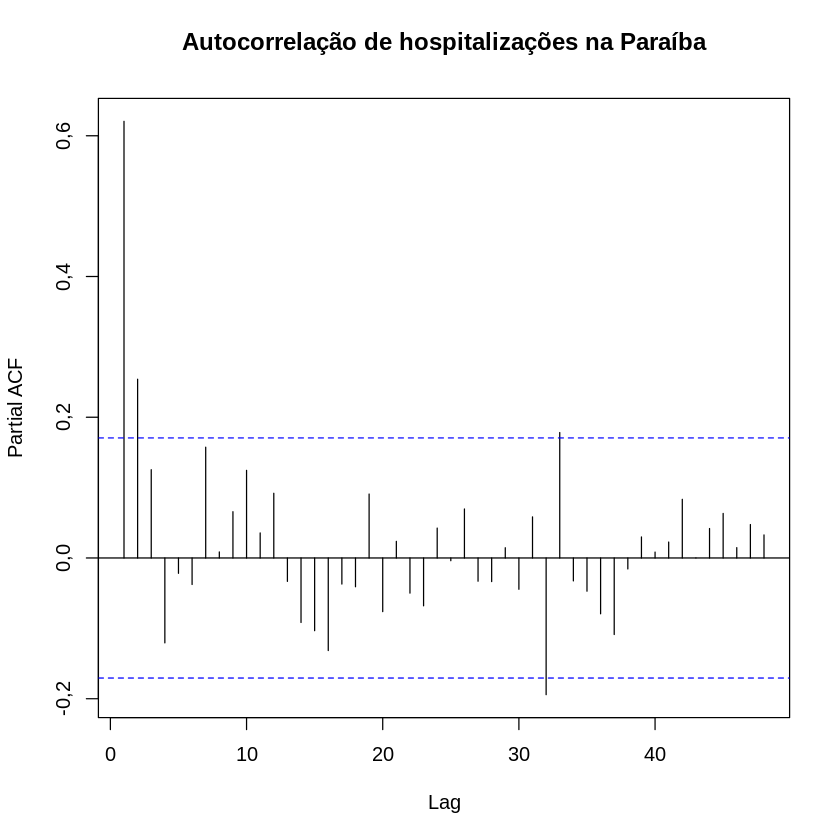

In [18]:
pacf(hosptpb,lag=48,main="Autocorrelação de hospitalizações na Paraíba")

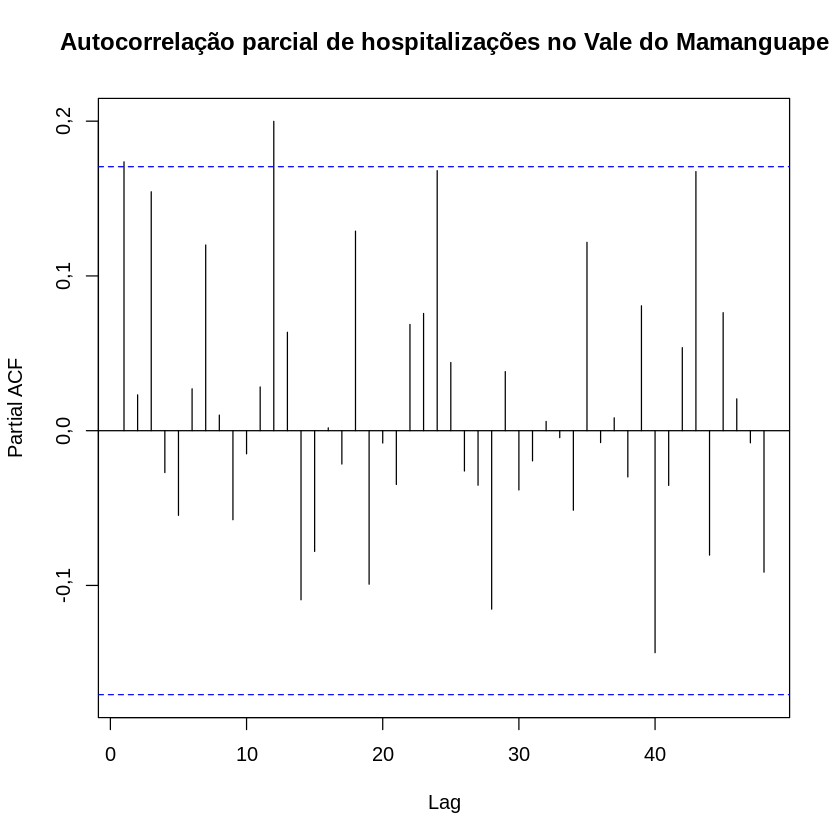

In [19]:
pacf(hosptvale,lag=48,main="Autocorrelação parcial de hospitalizações no Vale do Mamanguape")

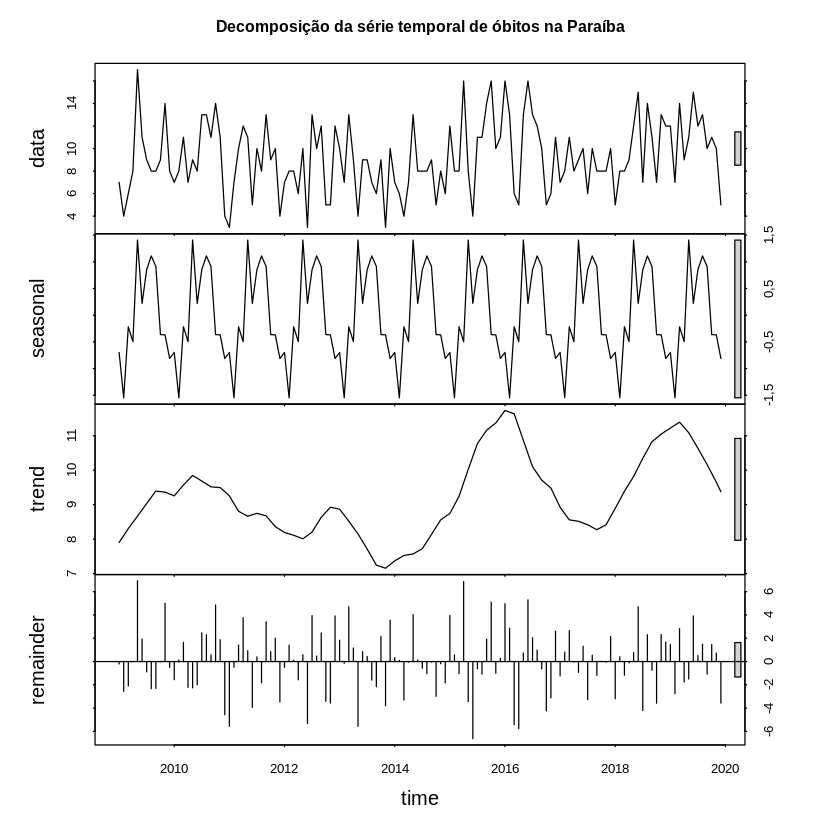

In [20]:
ajuste.stl_obitospb <- stl(ts_obitospb, "per")
plot(ajuste.stl_obitospb, main="Decomposição da série temporal de óbitos na Paraíba")

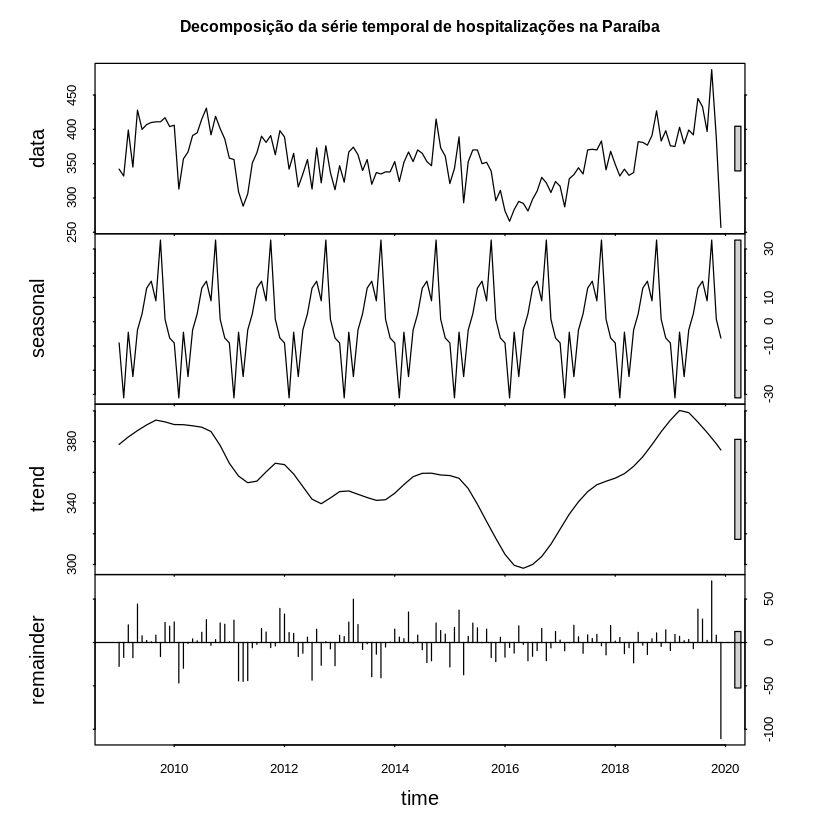

In [21]:
ajuste.stl_hosptpb <- stl(ts_hosptpb, "per")
plot(ajuste.stl_hosptpb, main="Decomposição da série temporal de hospitalizações na Paraíba")

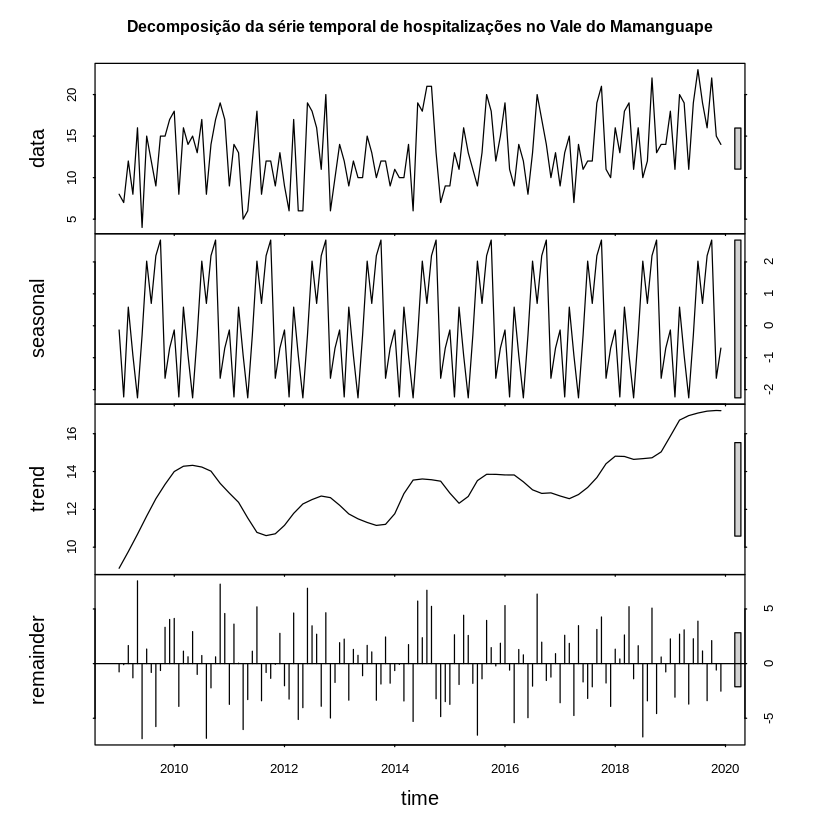

In [22]:
ajuste.stl_hosptvale <- stl(ts_hosptvale, "per")
plot(ajuste.stl_hosptvale, main="Decomposição da série temporal de hospitalizações no Vale do Mamanguape")

In [106]:
ajuste.sarima_obitospb = arima(obitospb,order=c(2,0,1))
ajuste.sarima_obitospb

ajuste.sarima_hosptpb = arima(hosptpb,order=c(10,0,4))
ajuste.sarima_hosptpb

ajuste.sarima_hosptvale = arima(hosptvale,order=c(1,0,1))
ajuste.sarima_hosptvale


Call:
arima(x = obitospb, order = c(2, 0, 1))

Coefficients:
         ar1      ar2     ma1  intercept
      0,0214  -0,0060  0,1716     9,2269
s.e.  1,2073   0,2463  1,2046     0,3196

sigma^2 estimated as 9,537:  log likelihood = -336,16,  aic = 682,32


Call:
arima(x = hosptpb, order = c(10, 0, 4))

Coefficients:
         ar1     ar2      ar3     ar4     ar5     ar6     ar7      ar8      ar9
      1,1246  0,1433  -0,9734  0,3712  0,0972  0,0869  0,0896  -0,2639  -0,1020
s.e.  0,1948  0,1977   0,1630  0,2432  0,1953  0,2059  0,2125   0,1662   0,1741
        ar10      ma1      ma2     ma3      ma4  intercept
      0,2962  -0,7608  -0,1797  1,1412  -0,4400   359,4942
s.e.  0,1134   0,2050   0,1470  0,1328   0,2004    12,5037

sigma^2 estimated as 689,7:  log likelihood = -623,77,  aic = 1279,54


Call:
arima(x = hosptvale, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0,8191  -0,6991    13,2135
s.e.  0,6511   0,8104     0,5986

sigma^2 estimated as 17,13:  log likelihood = -374,85,  aic = 757,71

In [107]:
obitos6_pb = obitospb[1:66]
obitos6_pb = ts(obitos6_pb, start=c(2009,01), frequency=12)
ajuste.sarima_obitos6_pb = arima(obitos6_pb,order=c(2,0,1))
pacc_obitos_pb = predict(ajuste.sarima_obitos6_pb, 6)
obitos_reais6_pb <- obitospb[67:72]
obitos_prev6_pb <- pacc_obitos_pb$pred

hospt6_pb = hosptpb[1:66]
hospt6_pb = ts(hospt6_pb, start=c(2009,01), frequency=12)
ajuste.sarima_hospt6_pb = arima(hospt6_pb,order=c(10,0,4))
pacc_hospt_pb = predict(ajuste.sarima_hospt6_pb, 6)
hospt_reais6_pb <- hosptpb[67:72]
hospt_prev6_pb <- pacc_hospt_pb$pred

hospt6_vale = hosptvale[1:66]
hospt6_pb = ts(hospt6_vale, start=c(2009,01), frequency=12)
ajuste.sarima_hospt6_vale = arima(hospt6_vale,order=c(1,0,1))
pacc_hospt_vale = predict(ajuste.sarima_hospt6_vale, 6)
hospt_reais6_vale <- hosptvale[67:72]
hospt_prev6_vale <- pacc_hospt_vale$pred

In [108]:
h_obitos_pb = 6
C1_obitos_pb = sum(obitos_reais6_pb) - sum(obitos_prev6_pb)
C2_obitos_pb = ((sum(obitos_reais6_pb) - sum(obitos_prev6_pb)) / sum(obitos_reais6_pb)) * 100
C3_obitos_pb = (1/h_obitos_pb) * sum((obitos_reais6_pb - obitos_prev6_pb) ^ 2)
C4_obitos_pb = (1/h_obitos_pb) * sum(abs(obitos_reais6_pb - obitos_prev6_pb))

h_hospt_pb = 6
C1_hospt_pb = sum(hospt_reais6_pb) - sum(hospt_prev6_pb)
C2_hospt_pb = ((sum(hospt_reais6_pb) - sum(hospt_prev6_pb)) / sum(hospt_reais6_pb)) * 100
C3_hospt_pb = (1/h_hospt_pb) * sum((hospt_reais6_pb - hospt_prev6_pb) ^ 2)
C4_hospt_pb = (1/h_hospt_pb) * sum(abs(hospt_reais6_pb - hospt_prev6_pb))

h_hospt_vale = 6
C1_hospt_vale = sum(hospt_reais6_vale) - sum(hospt_prev6_vale)
C2_hospt_vale = ((sum(hospt_reais6_vale) - sum(hospt_prev6_vale)) / sum(hospt_reais6_vale)) * 100
C3_hospt_vale = (1/h_hospt_vale) * sum((hospt_reais6_vale - hospt_prev6_vale) ^ 2)
C4_hospt_vale = (1/h_hospt_vale) * sum(abs(hospt_reais6_vale - hospt_prev6_vale))

In [109]:
pacc_obitos_pb$pred + 1.96*pacc_obitos_pb$se
pacc_obitos_pb$pred - 1.96*pacc_obitos_pb$se

pacc_hospt_pb$pred + 1.96*pacc_hospt_pb$se
pacc_hospt_pb$pred - 1.96*pacc_hospt_pb$se

pacc_hospt_vale$pred + 1.96*pacc_hospt_vale$se
pacc_hospt_vale$pred - 1.96*pacc_hospt_vale$se

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

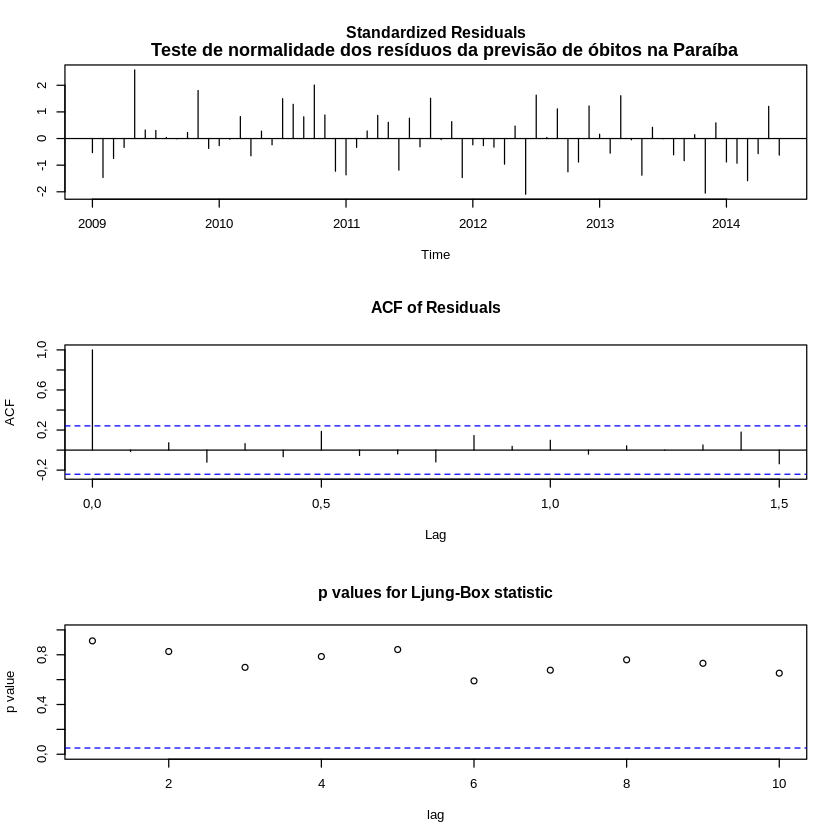

In [110]:
tsdiag(ajuste.sarima_obitos6_pb)
title("Teste de normalidade dos resíduos da previsão de óbitos na Paraíba",cex.main=0.90)

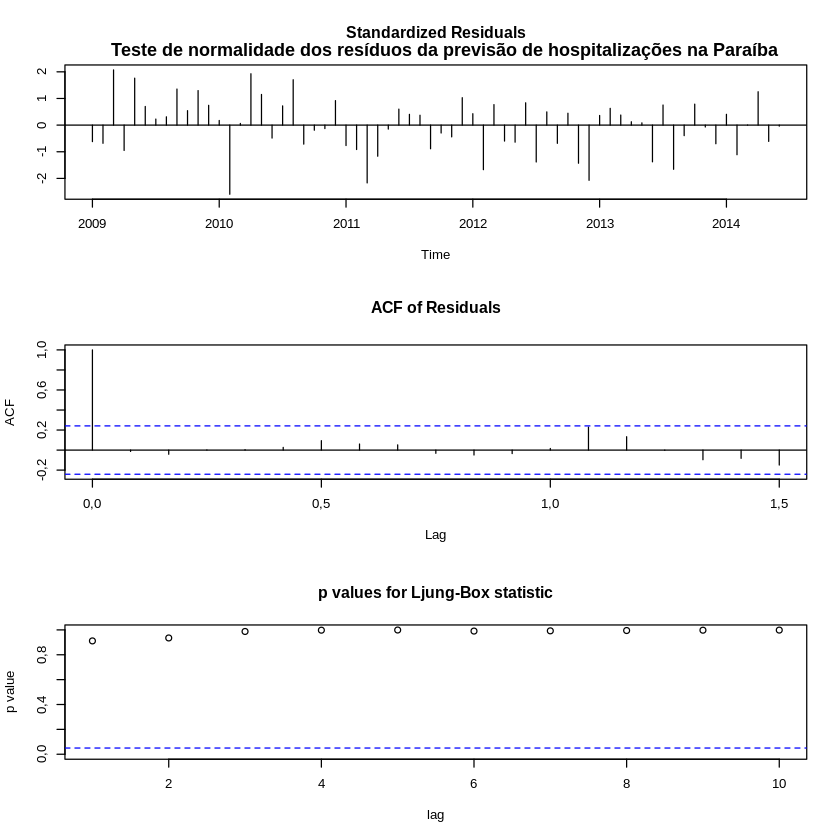

In [111]:
tsdiag(ajuste.sarima_hospt6_pb)
title("Teste de normalidade dos resíduos da previsão de hospitalizações na Paraíba",cex.main=0.90)

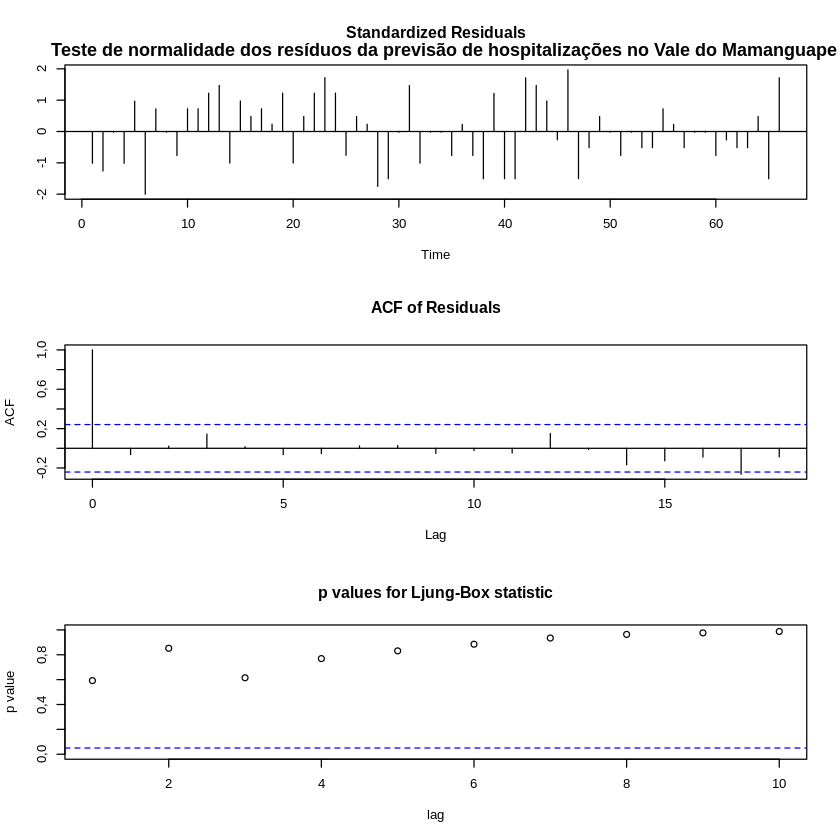

In [112]:
tsdiag(ajuste.sarima_hospt6_vale)
title("Teste de normalidade dos resíduos da previsão de hospitalizações no Vale do Mamanguape",cex.main=0.90)

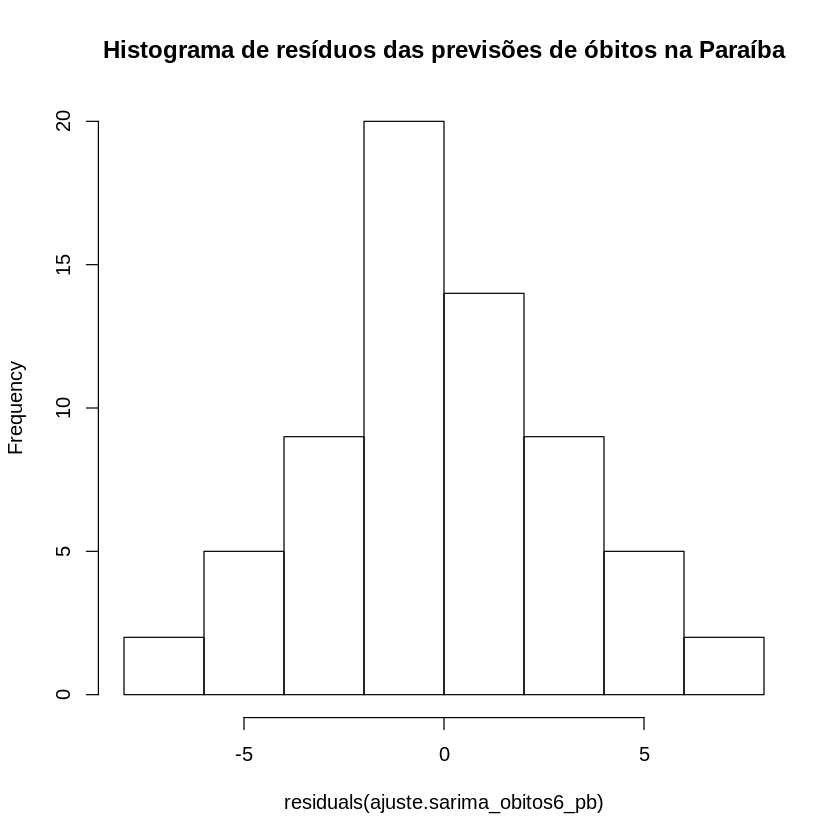

In [113]:
hist(residuals(ajuste.sarima_obitos6_pb), main="Histograma de resíduos das previsões de óbitos na Paraíba")

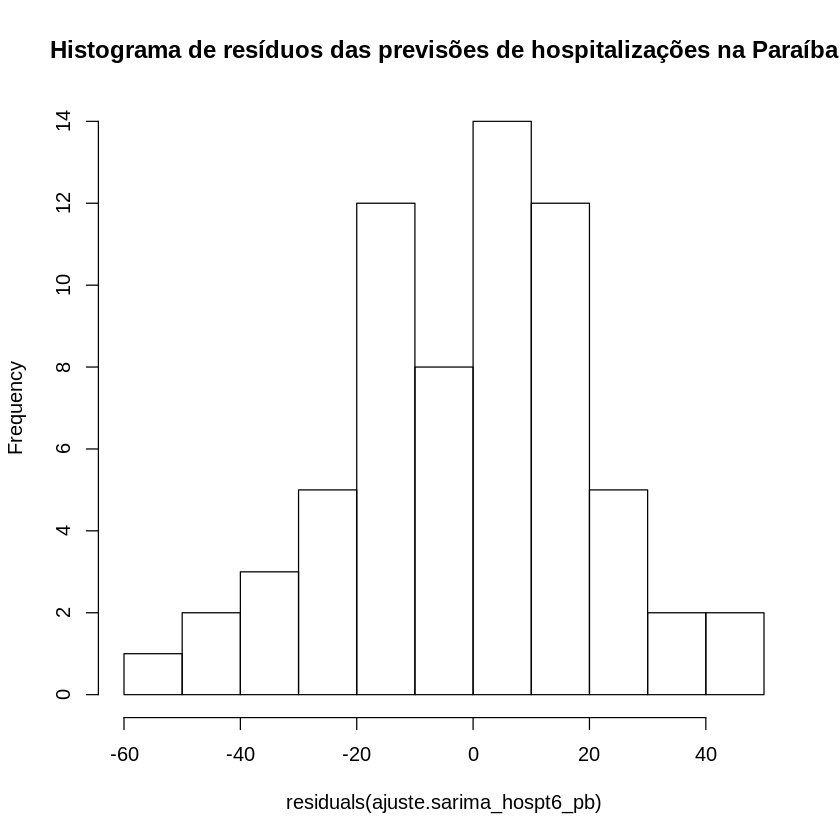

In [114]:
hist(residuals(ajuste.sarima_hospt6_pb), main="Histograma de resíduos das previsões de hospitalizações na Paraíba")

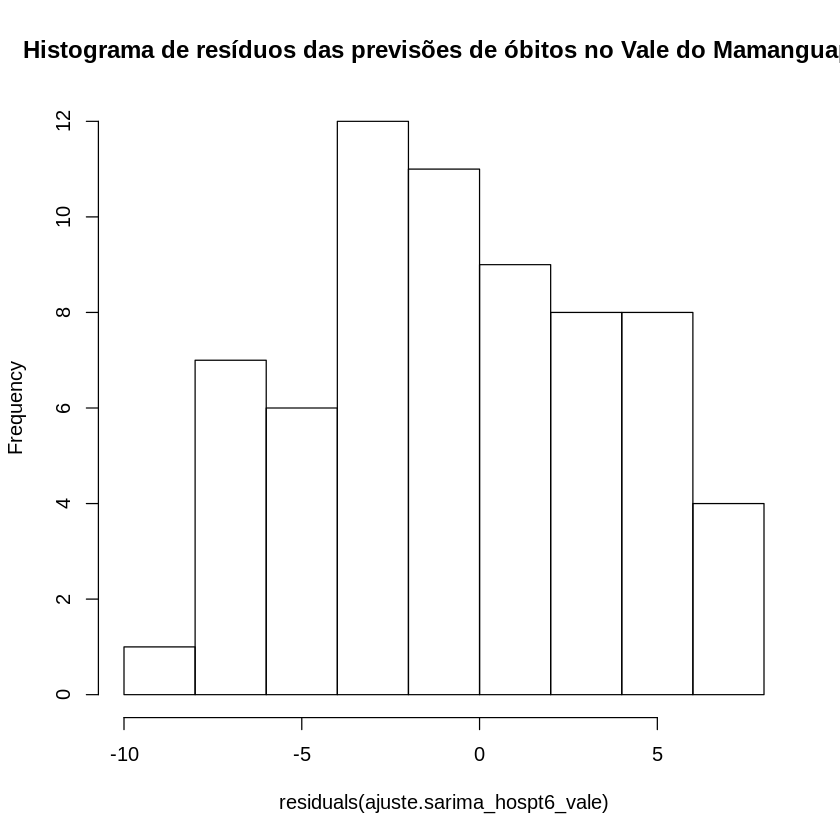

In [115]:
hist(residuals(ajuste.sarima_hospt6_vale), main="Histograma de resíduos das previsões de óbitos no Vale do Mamanguape")

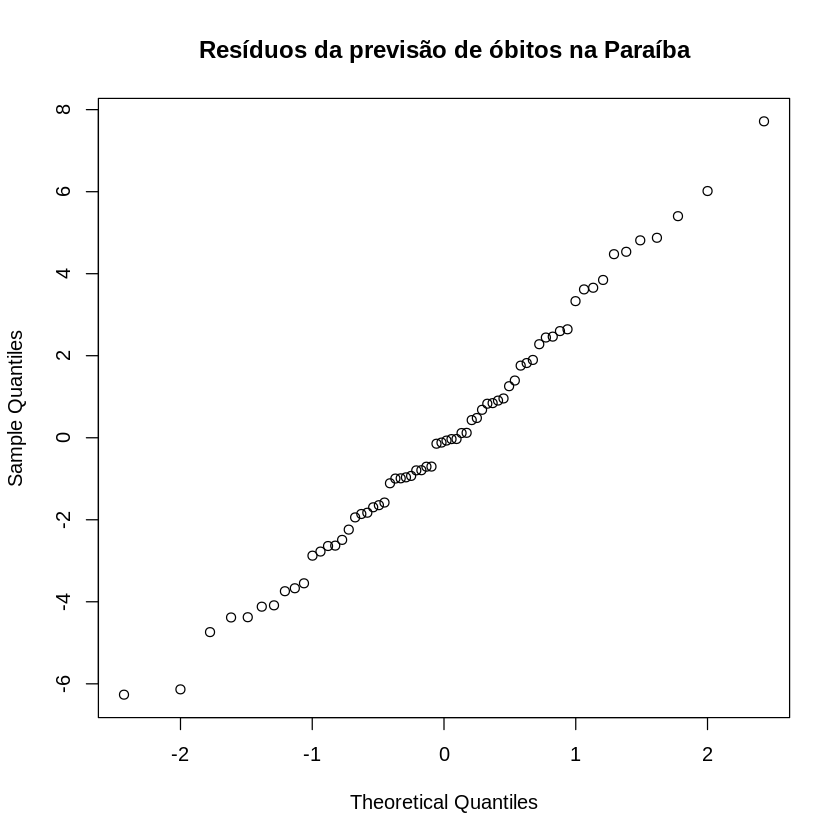

In [116]:
qqnorm(residuals(ajuste.sarima_obitos6_pb), main="Resíduos da previsão de óbitos na Paraíba")

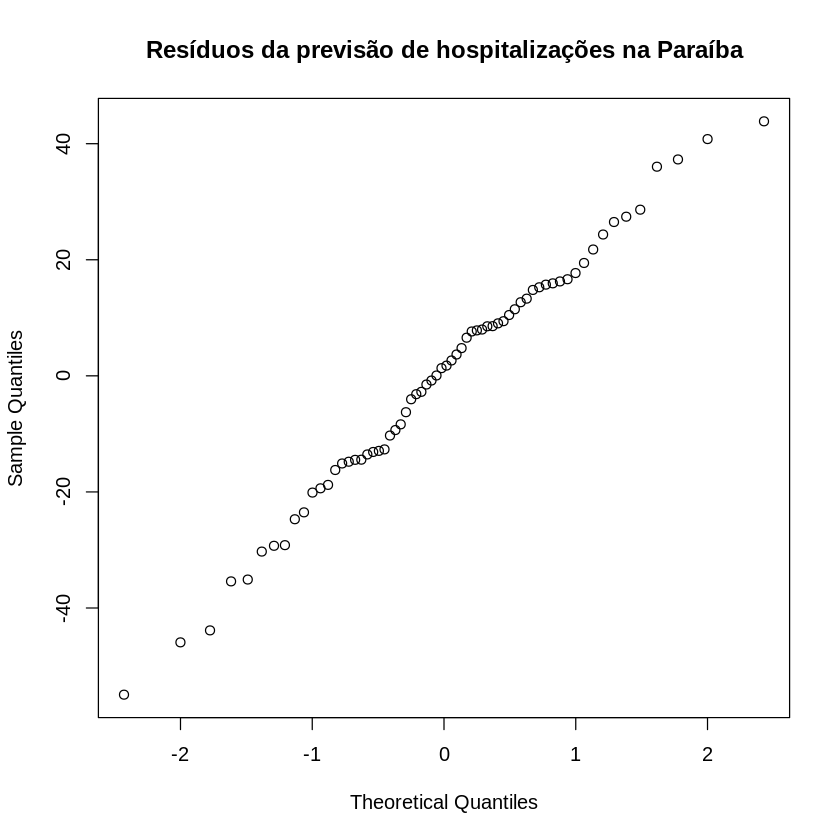

In [117]:
qqnorm(residuals(ajuste.sarima_hospt6_pb), main="Resíduos da previsão de hospitalizações na Paraíba")

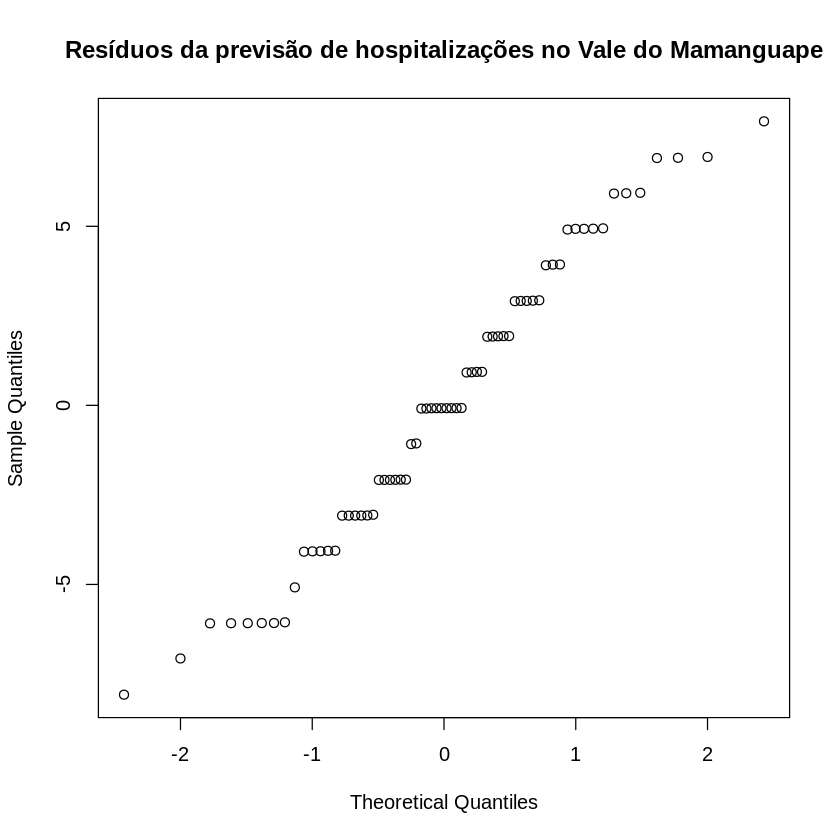

In [118]:
qqnorm(residuals(ajuste.sarima_hospt6_vale), main="Resíduos da previsão de hospitalizações no Vale do Mamanguape")

In [119]:
lillie.test(residuals(ajuste.sarima_obitos6_pb))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(ajuste.sarima_obitos6_pb)
D = 0,058993, p-value = 0,8236


In [120]:
lillie.test(residuals(ajuste.sarima_hospt6_pb))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(ajuste.sarima_hospt6_pb)
D = 0,074271, p-value = 0,4889


In [121]:
lillie.test(residuals(ajuste.sarima_hospt6_vale))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(ajuste.sarima_hospt6_vale)
D = 0,088887, p-value = 0,2199
